In [1]:
import numpy as np
#prepare the quiver plot showing velocity arrows
angle = np.zeros_like(grd.lon_rho.values)
u_rho,v_rho = rotate_vector_roms(ds.u.isel(s_rho=0,ocean_time=0).values, ds.v.isel(s_rho=0,ocean_time=0).values, angle)
oo = (grd.mask_rho==1)
u_rho[~oo]=np.nan
v_rho[~oo]=np.nan

NameError: name 'grd' is not defined

In [ ]:
#basal melting with currents quiver

%matplotlib notebook
bl = 2
plt.close()
ds.m.where((grd.mask_rho==1)).isel(s_rho=0,ocean_time=0).plot(cmap=plt.cm.bwr,size=8,vmin=-3,vmax=3)
quiverp = plt.quiver(np.arange(0,630,bl),np.arange(0,530,bl),u_rho[::bl,::bl],v_rho[::bl,::bl],
                     pivot="mid", color='black',alpha=0.3,scale_units='xy',scale=0.01)
plt.quiverkey(quiverp, 0.75, 0.90, 0.2, r'$20 \frac{cm}{s}$', labelpos='E',coordinates='figure')
plt.title('annual mean basal melt rate in [m/a]')
plt.show()

In [1]:
import xarray as xr
import os
import sys
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
dotenv_path

# load up the entries as environment variables
load_dotenv(dotenv_path)

sys.path.append(os.path.join(os.environ.get('srcdir')))

from visualization.plot_barotropic_xr import plot_uv
from visualization.plot_dpt import plot_timeseries

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1
%aimport visualization.plot_barotropic_xr, visualization.plot_dpt

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<IPython.core.display.Javascript object>


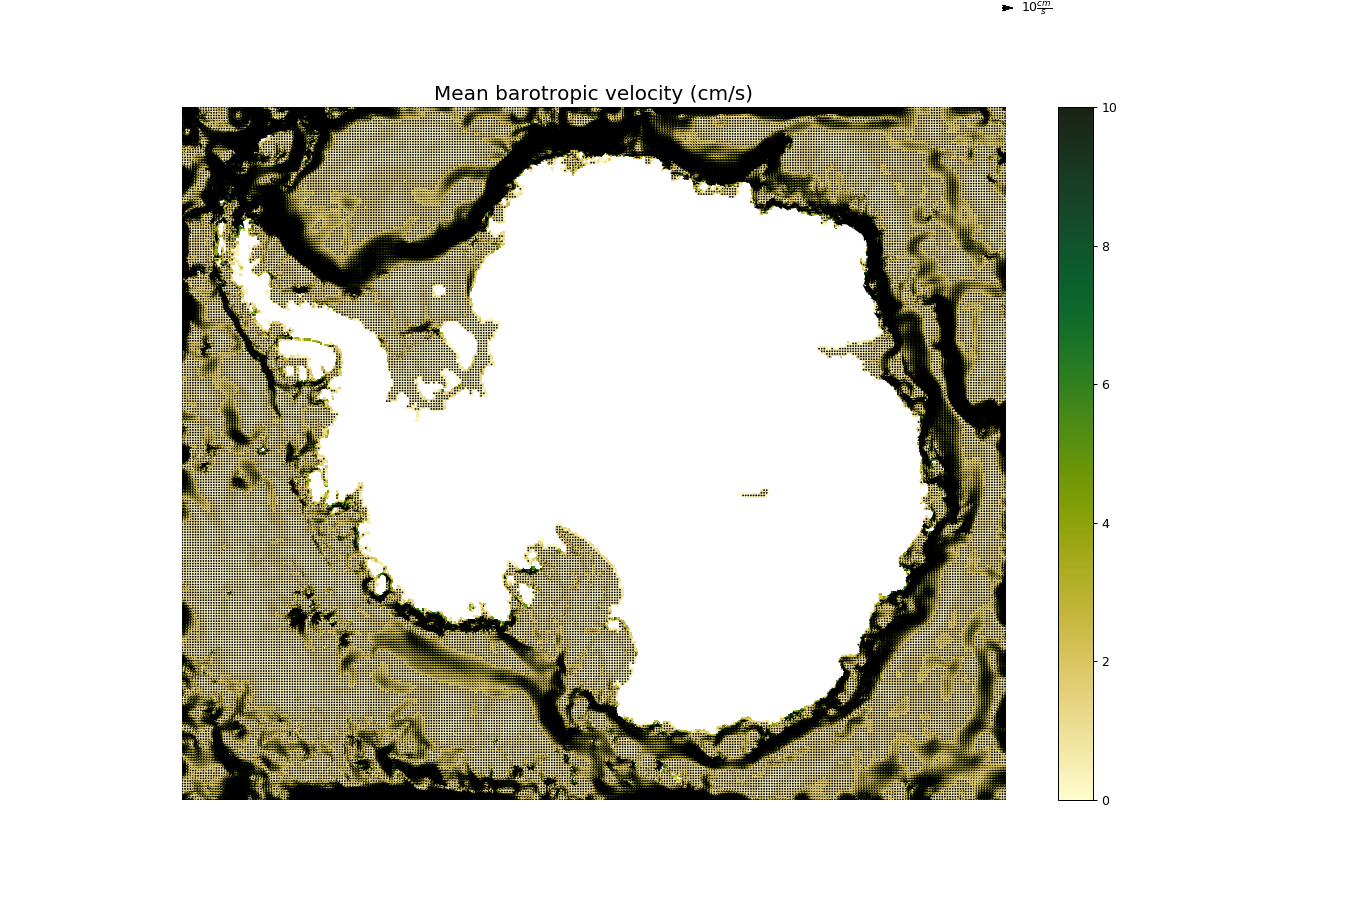

test


<IPython.core.display.Javascript object>


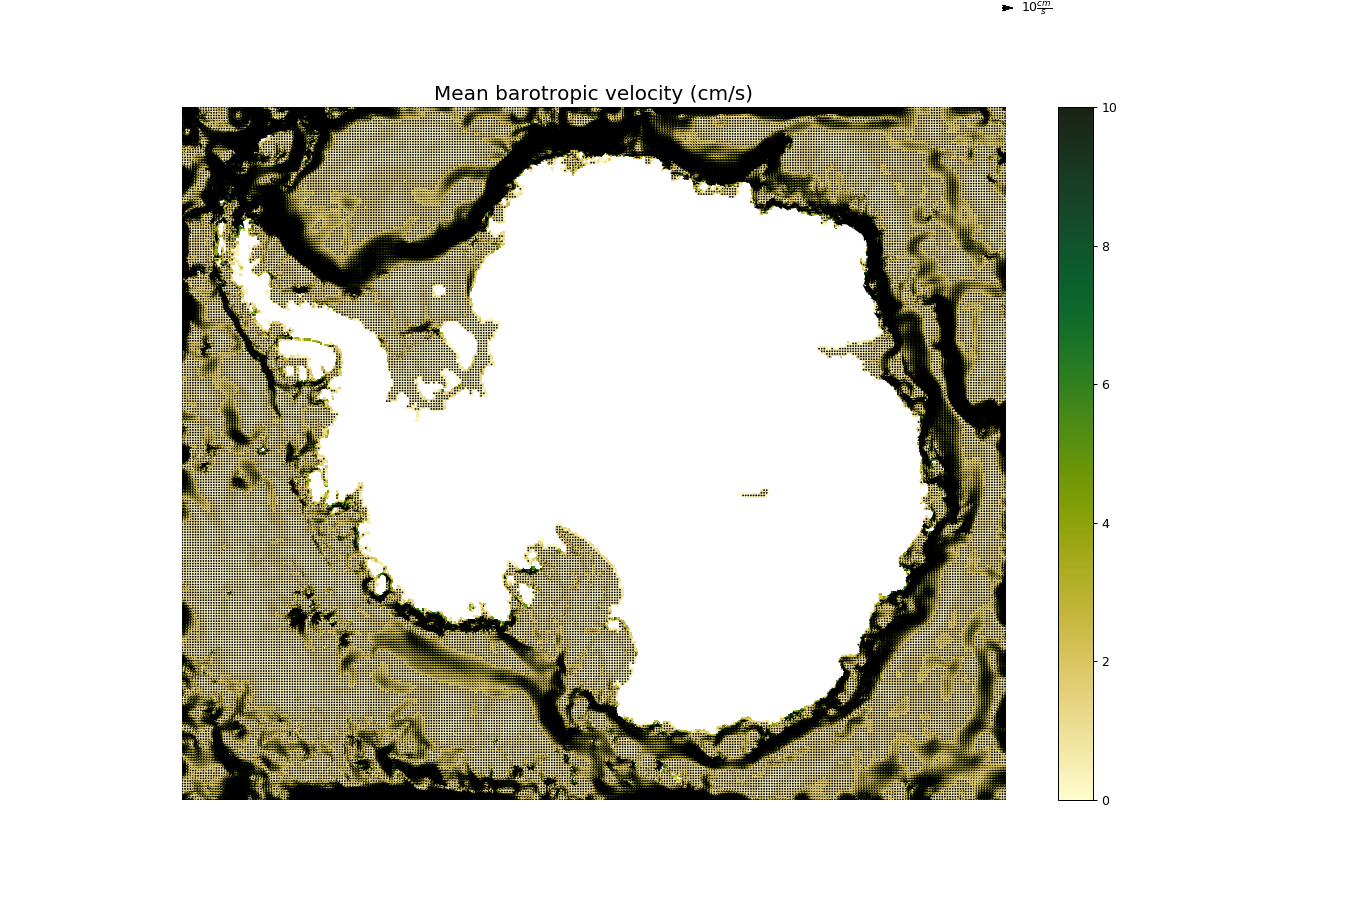

In [2]:
%matplotlib notebook
file_path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small','ocean_avg_spinUp_0010.nc')
ds = xr.open_mfdataset(file_path)
file_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_v2.0_frc','waom10_small_grd.nc')
grd = xr.open_dataset(file_path)
plot_uv(ds.mean('ocean_time'),grd)

Reading grid
Reading data
Rotating velocity vector
interpolate everything to dp coordinates
mean dy: 11119.4926645
Plotting


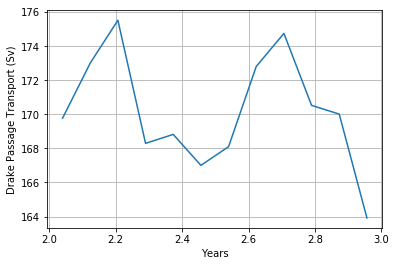

In [3]:
plot_timeseries(file_path)

Reading grid
Reading data
Rotating velocity vector
interpolate everything to dp coordinates
mean dy: 11119.4926645
Plotting


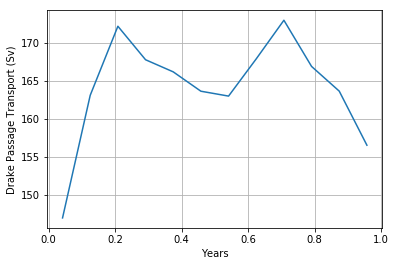

Reading grid
Reading data
Rotating velocity vector
interpolate everything to dp coordinates
mean dy: 11119.4926645
Plotting


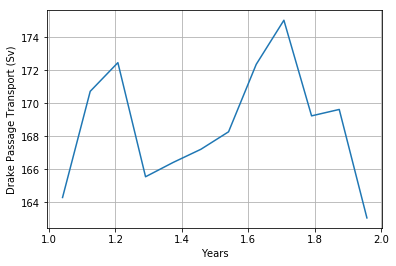

In [5]:
file_path1 = os.path.join(os.environ.get('rawdir'),'waom','ocean_avg_0001.nc')
plot_timeseries(file_path1)
file_path2 = os.path.join(os.environ.get('rawdir'),'waom','ocean_avg_0002.nc')
plot_timeseries(file_path2)